In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

a)


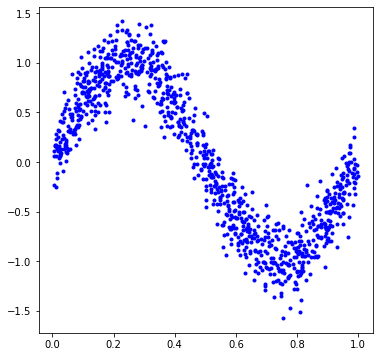

In [2]:
df = pd.read_csv('./poly_reg_p.csv', header=None)

x = df[0].to_numpy()
y = df[1].to_numpy()

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

fig = plt.figure(figsize=(6,6))
plt.plot(x, y, 'b.')
print('a)')
plt.show()

Holdout cross-validation (70/30%)
Tempo de execução: 1.6048 [s]

Curvas de aprendizado


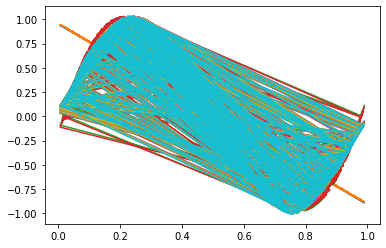

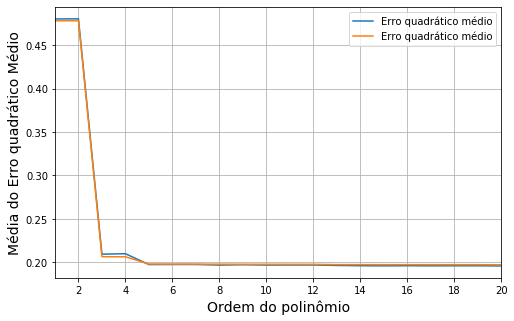

In [3]:
#b)
# Get timestamp of holdout start.
starttime = timeit.default_timer()
include_bias = True

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)

mean_vec = []
train_vec = []
for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(x_train, y_train)
    
    y_val_predict = polynomial_regression.predict(x_val)
    y_train_predict = polynomial_regression.predict(x_train)
    
    plt.plot(x_val, y_val_predict, label='Hipótese $\lambda=$'+str(d))

    mean_vec.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    train_vec.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("Holdout cross-validation (70/30%)")
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), mean_vec,  label='Erro quadrático médio')
plt.plot(range(1, 21), train_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()
    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))
print("\nCurvas de aprendizado")

k-fold cross-validation (k=10)
Tempo de execução: 0.9292 [s]


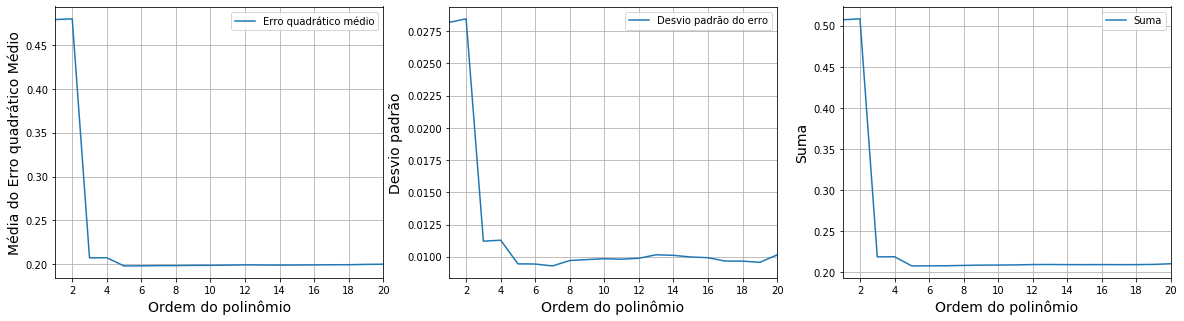

In [4]:
print('k-fold cross-validation (k=10)')

# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

mean_vec = []
std_vec = []
for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 3, 1)
plt.plot(range(1, 21), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

ax = plt.subplot(1, 3, 2)
plt.plot(range(1, 21), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

ax = plt.subplot(1, 3, 3)
plt.plot(range(1, 21), np.add(mean_vec, std_vec),  label='Suma')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Suma', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

#Show the plot.
plt.show()

kLeave-one-out cross-validation
Tempo de execução: 84.6765 [s]


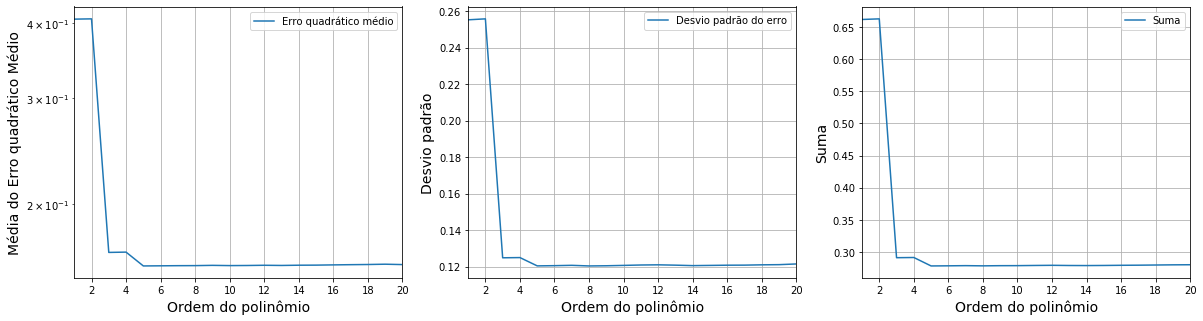

In [5]:
print('kLeave-one-out cross-validation')
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the LOOCV object.
loocv = LeaveOneOut()

mean_vec = []
std_vec = []
for d in range(1, 21):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=loocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 3, 1)
plt.plot(range(1, 21), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.yscale('log')
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
#plt.ylim([0.78, 0.81])
plt.legend()
plt.grid()

ax = plt.subplot(1, 3, 2)
plt.plot(range(1, 21), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

ax = plt.subplot(1, 3, 3)
plt.plot(range(1, 21), np.add(mean_vec, std_vec),  label='Suma')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Suma', fontsize=14)
plt.xticks(range(0, 21, 2))
plt.xlim([1, 20])
plt.legend()
plt.grid()

# Save figure
plt.savefig("leave_one_out.png", dpi=600)
#Show the plot.
plt.show()

c)


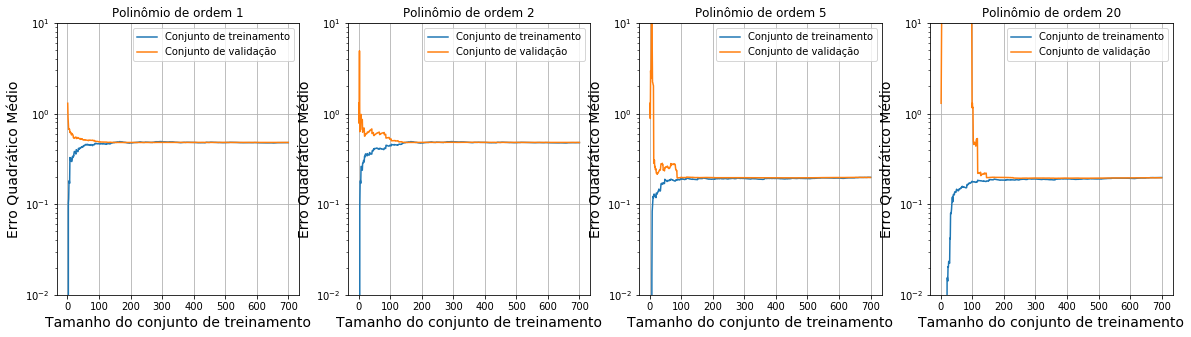

In [12]:
degrees = [1, 2, 5, 20]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = polynomial_regression.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.ylim([1e-2, 10])
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    
# Save figure
plt.savefig("learning_curves.png", dpi=600)
#Show the plot.
print('c)')
plt.show()

## No polinômio de ordem 1 (reta) e ordem 2, os modelos estão sub-ajustando. Ambas as curvas atingiram um platô; eles são próximas e os erros são razoavelmente altos. Quando o conjunto de treinamento tem mais um o dois exemplos, torna-se impossível para o modelo ajustar-se os dados de treinamento perfeitamente, tanto porque os dados contem ruído quanto porque não são lineares. Com relação ao conjunto de validação, uma linha reta ou o polinomio de ordem 2 não pode executar um bom trabalho de modelagem dos dados; e portanto, o erro termina em um platô, muito próximo da curva do erro de treinamento.
## Nos polinômios de ordem 5 e ordem 20, tanto o erro de treinamento quanto o de validação são menores do que com o modelo de polinômio de ordem 1 (reta) e ordem 2. A diferença entre os dois erros diminui com aumento do conjunto de treinamento se tonando pequena e constante.
## No polinomio de ordem 20 há um espaço entre as curvas do erro de treinamento e validação quando o tamanho do conjunto de treinamento é menor que 100. Isso significa que o modelo está sobre-ajustando. Quando o modelo é alimentá-do com mais dados de treinamento o erro de validação atinje ao erro de treinamento e o modelo não sobre-ajusta.

In [13]:
#d)
# Instantiate a polynomial.
poly_features = PolynomialFeatures(degree=5, include_bias=include_bias)
# Instantiate a scaler.
std_scaler = StandardScaler()
# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

polynomial_regression.fit(x, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

e)


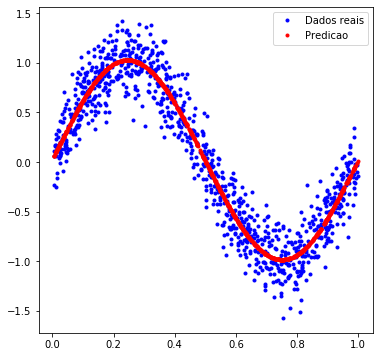

In [14]:
print('e)')
y_predict = polynomial_regression.predict(x)
fig = plt.figure(figsize=(6,6))
plt.plot(x, y, 'b.', label='Dados reais')
plt.plot(x, y_predict, 'r.', label='Predicao')
plt.legend()
plt.show()